In [1]:
# Imporing Libraries
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Datset
Fraud=pd.read_csv("C:/Users/Shubham Tiwari/Downloads/Fraud_check.csv")
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
Fraud.shape

(600, 6)

In [4]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
Fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## Pairplot

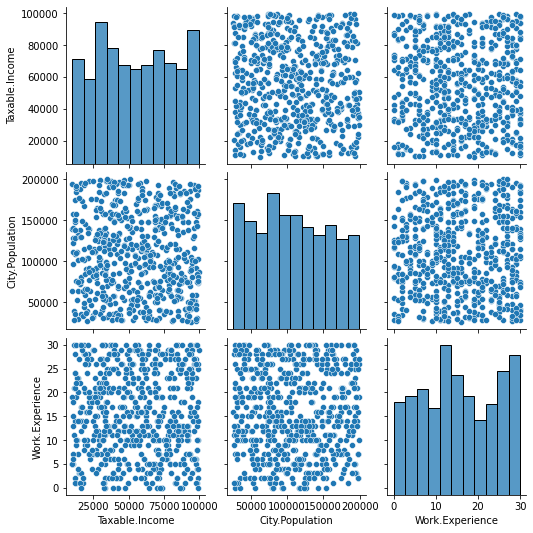

In [6]:
sns.pairplot(Fraud)

## Boxplot

<AxesSubplot:xlabel='Work.Experience'>

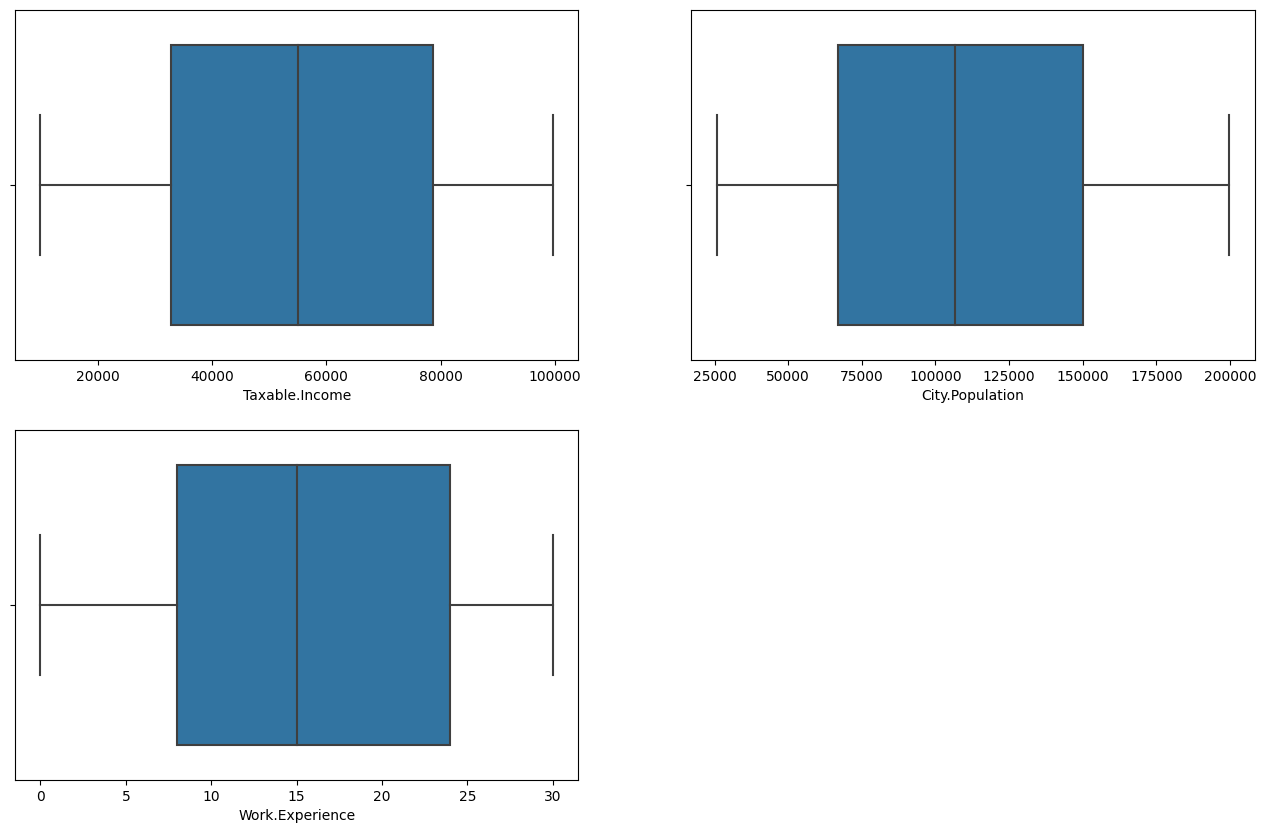

In [7]:
# Making boxplot
plt.subplots(figsize=(16, 10))

plt.subplot(2,2,1)
sns.boxplot(x=Fraud["Taxable.Income"])

plt.subplot(2,2,2)
sns.boxplot(x=Fraud["City.Population"])

plt.subplot(2,2,3)
sns.boxplot(x=Fraud["Work.Experience"])

## Barplot

Text(0.5, 1.0, 'Urban')

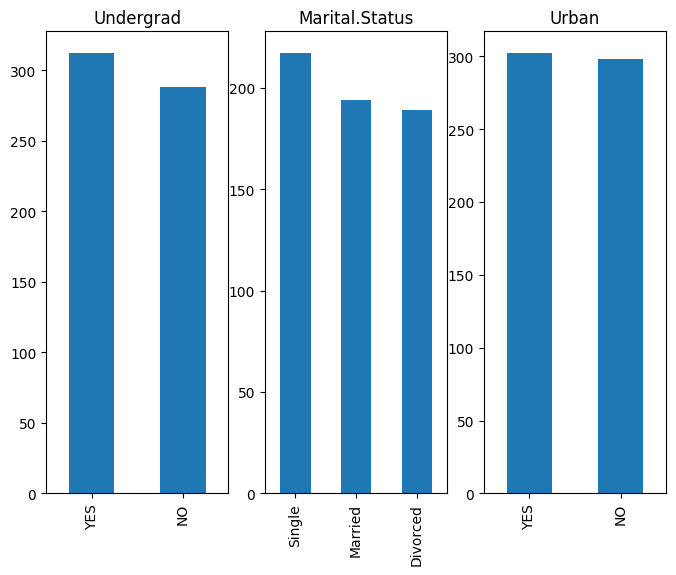

In [8]:
# Making Barplot on ('Urban','us' and 'ShelveLoc') by using Subplot
plt.subplots(figsize=(8,6))

plt.subplot(1,3,1)
Fraud['Undergrad'].value_counts().plot.bar()
plt.title("Undergrad")

plt.subplot(1,3,2)
Fraud['Marital.Status'].value_counts().plot.bar()
plt.title("Marital.Status")

plt.subplot(1,3,3)
Fraud['Urban'].value_counts().plot.bar()
plt.title("Urban")

### Histogram

Text(0.5, 1.0, 'Work.Experience')

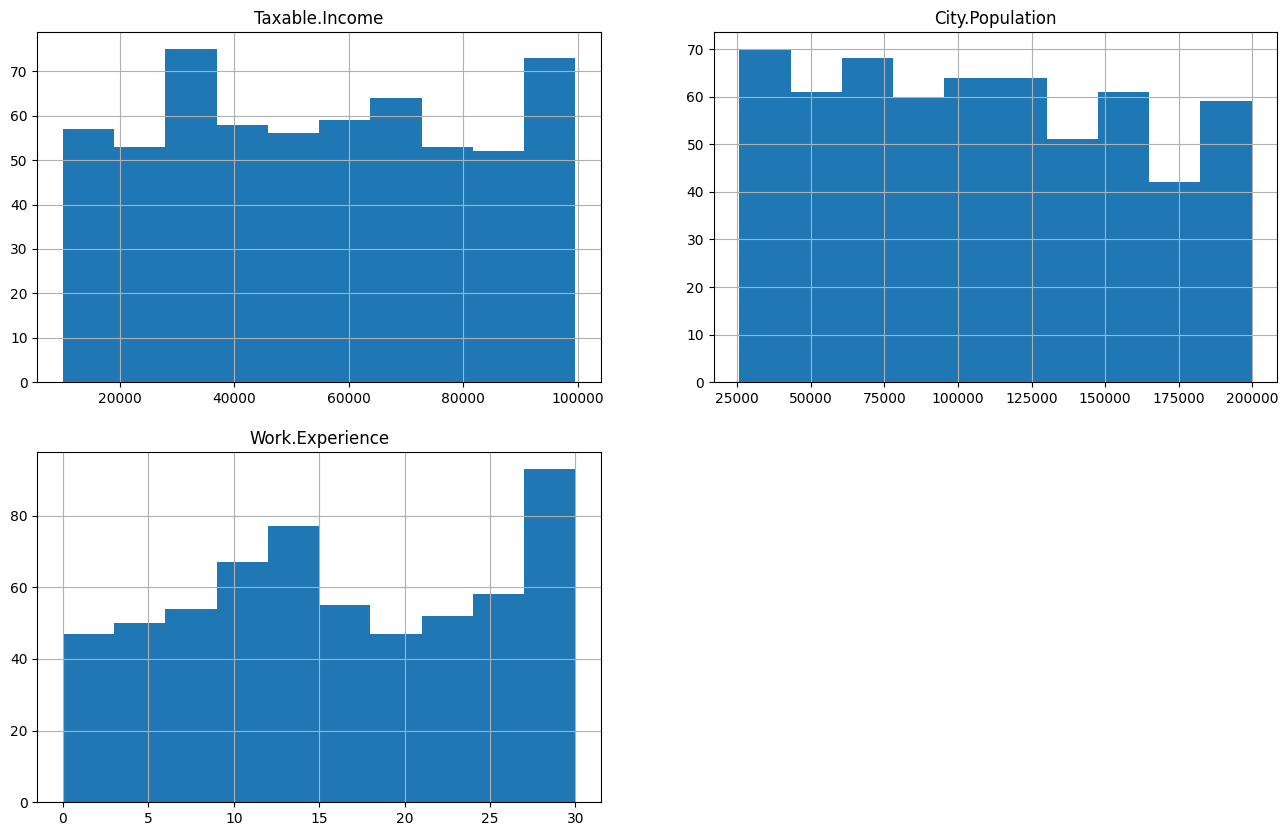

In [9]:
plt.subplots(figsize=(16, 10))

plt.subplot(2,2,1)
Fraud['Taxable.Income'].hist()
plt.title("Taxable.Income")

plt.subplot(2,2,2)
Fraud['City.Population'].hist()
plt.title("City.Population")

plt.subplot(2,2,3)
Fraud['Work.Experience'].hist()
plt.title("Work.Experience")


### Boxplot and Histogram both in one

([<AxesSubplot:title={'center':'Taxable.Income'}>,
  <AxesSubplot:title={'center':'Taxable.Income'}>,
  Text(0.5, 1.0, 'Taxable.Income')],
 [<AxesSubplot:xlabel='Taxable.Income'>,
  <AxesSubplot:xlabel='Taxable.Income'>])

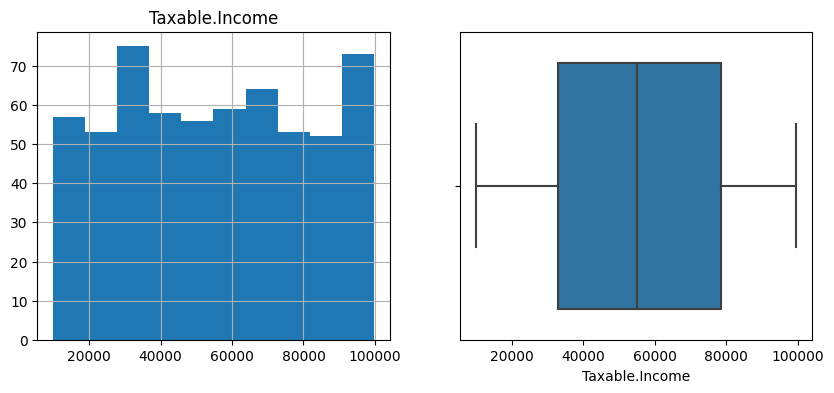

In [10]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),Fraud['Taxable.Income'].hist(),plt.title("Taxable.Income")],[plt.subplot(1,2,2),sns.boxplot(x=Fraud["Taxable.Income"])]

([<AxesSubplot:title={'center':'City.Population'}>,
  <AxesSubplot:title={'center':'City.Population'}>,
  Text(0.5, 1.0, 'City.Population')],
 [<AxesSubplot:xlabel='City.Population'>,
  <AxesSubplot:xlabel='City.Population'>])

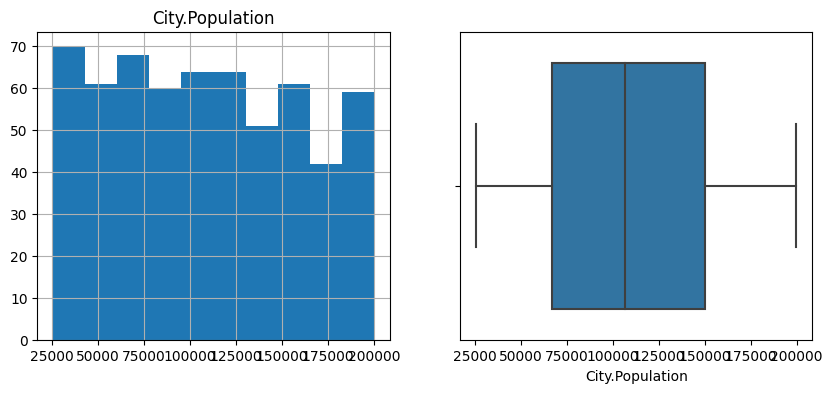

In [11]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),Fraud['City.Population'].hist(),plt.title("City.Population")],[plt.subplot(1,2,2),sns.boxplot(x=Fraud["City.Population"])]

([<AxesSubplot:title={'center':'Work.Experience'}>,
  <AxesSubplot:title={'center':'Work.Experience'}>,
  Text(0.5, 1.0, 'Work.Experience')],
 [<AxesSubplot:xlabel='Work.Experience'>,
  <AxesSubplot:xlabel='Work.Experience'>])

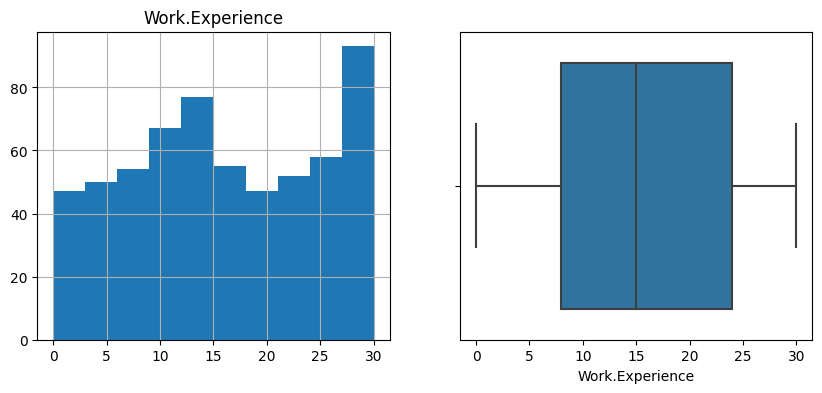

In [12]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),Fraud['Work.Experience'].hist(),plt.title("Work.Experience")],[plt.subplot(1,2,2),sns.boxplot(x=Fraud["Work.Experience"])]

In [13]:
Fraud['Marital.Status'].unique(), Fraud['Marital.Status'].value_counts()

(array(['Single', 'Divorced', 'Married'], dtype=object),
 Single      217
 Married     194
 Divorced    189
 Name: Marital.Status, dtype: int64)

In [14]:
Fraud['Undergrad'].unique(), Fraud['Undergrad'].value_counts()

(array(['NO', 'YES'], dtype=object),
 YES    312
 NO     288
 Name: Undergrad, dtype: int64)

In [15]:
Fraud['Urban'].unique(), Fraud['Urban'].value_counts()

(array(['YES', 'NO'], dtype=object),
 YES    302
 NO     298
 Name: Urban, dtype: int64)

In [16]:
print('Maximum income in data set', Fraud['Taxable.Income'].max())
print('Mimimum income in data set', Fraud['Taxable.Income'].min())

Maximum income in data set 99619
Mimimum income in data set 10003


In [17]:
# adding one "Target " column in dataset
# in bins { bins = [10000= minimum data , 30000=condition , 99620=maximum data ]}
Fraud["Target"] = pd.cut(Fraud["Taxable.Income"], bins = [10000,30000,99620], labels = ["Risky", "Good"])

In [18]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [19]:
Fraud['Target'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [20]:
Fraud['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [21]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
Fraud['Marital.Status']= label_encoder.fit_transform(Fraud['Marital.Status'])

In [22]:
Fraud['Undergrad']= label_encoder.fit_transform(Fraud['Undergrad'])

In [23]:
Fraud['Target']= label_encoder.fit_transform(Fraud['Target'])

In [24]:
Fraud['Urban']= label_encoder.fit_transform(Fraud['Urban'])

In [25]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [26]:
x=Fraud.iloc[:,0:8]
y=Fraud['Target']

In [27]:
seed = 6
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)

#if you want to specify random_state them shuffle must be True

#kfold = KFold(n_splits=10)

In [28]:
cart = DecisionTreeClassifier()
num_trees = 50
model = BaggingClassifier(base_estimator = cart,
                          n_estimators = num_trees,
                          random_state = seed)

In [29]:
final_result = cross_val_score(model, x, y, cv = kfold)
final_result

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98333333])

In [30]:
print(final_result.mean())

0.9983333333333333


In [31]:
# Random Forest Classification
num_trees = 50
model_forest = RandomForestClassifier(n_estimators = num_trees,
                               max_features = 3)

In [32]:
result_forest = cross_val_score(model_forest, x, y, cv = kfold)
print(result_forest.mean())

1.0


In [33]:
# AdaBoost Classification

num_trees = 10
seed=7
model_adaboost = AdaBoostClassifier(n_estimators = num_trees,
                           random_state = seed)

In [34]:
result_adaboost = cross_val_score(model_adaboost, x, y, cv = kfold)
print(result_adaboost.mean())

1.0


In [35]:
# Stacking Ensemble for Classification

# create the sub models
estimators = []

model1_reg = LogisticRegression(max_iter=300)
estimators.append(('logistic', model1_reg))

In [36]:
model2_reg = DecisionTreeClassifier()
estimators.append(('cart', model2_reg))

In [37]:
model3_reg = SVC()
estimators.append(('svm', model3_reg))

In [38]:
# create the ensemble model

ensemble = VotingClassifier(estimators)

In [39]:
estimators

[('logistic', LogisticRegression(max_iter=300)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

In [40]:
results_final = cross_val_score(ensemble, x, y, cv = kfold)
print(results_final.mean())

0.985
